In [22]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("data_by_artist.csv")
num_rows = len(df)
print(f"Number of rows in the DataFrame: {num_rows}")
df.head(5)

Number of rows in the DataFrame: 28680


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


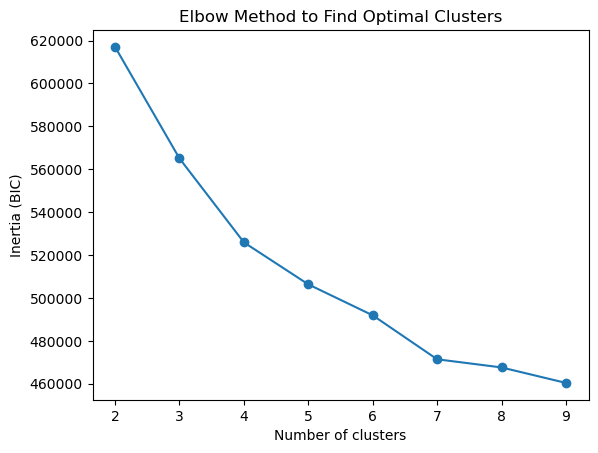

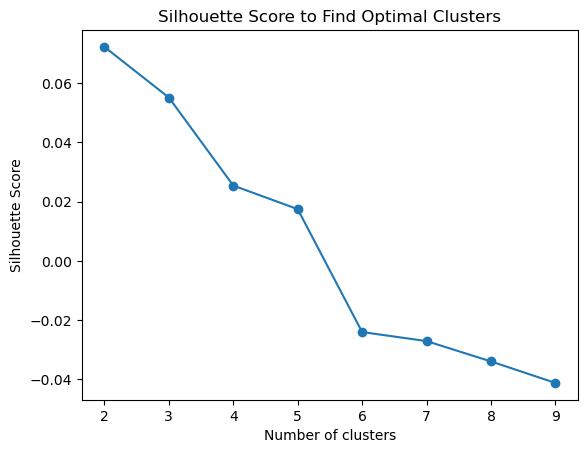

In [3]:
# Extract relevant features for clustering
features = df[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):  # Try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(features_scaled)
    inertia.append(gmm.bic(features_scaled))  # Use BIC (Bayesian Information Criterion) as a measure of model fit
    labels = gmm.predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plotting inertia to find the elbow point
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (BIC)')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal Clusters')
plt.show()

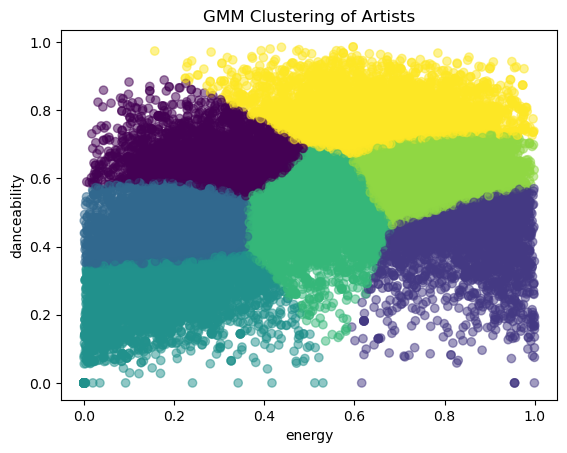

4    5563
6    5094
5    4705
2    4174
3    3490
0    3201
1    2453
Name: cluster, dtype: int64
cluster  key
0        7      519
         5      355
         0      335
         2      330
         10     265
               ... 
6        9      392
         5      387
         4      292
         8      273
         3      102
Name: key, Length: 84, dtype: int64


In [86]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset


# Extract relevant features for clustering
features = df[['danceability', 'energy']]


# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=7, random_state=42)  # You can adjust the number of components

# Fit the model
gmm.fit(features_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = gmm.predict(features_scaled)

# Visualize the clusters (you can modify this based on the number of features you choose)
plt.scatter(df['energy'], df['danceability'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('energy')
plt.ylabel('danceability')
plt.title('GMM Clustering of Artists')
plt.show()

# Check the distribution of classes within each cluster
print(df['cluster'].value_counts())
cluster_counts = df.groupby('cluster')['key'].value_counts()
print(cluster_counts)

/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6    5336
0    4705
3    4697
5    4130
2    3723
4    3092
1    2997
Name: Cluster, dtype: int64


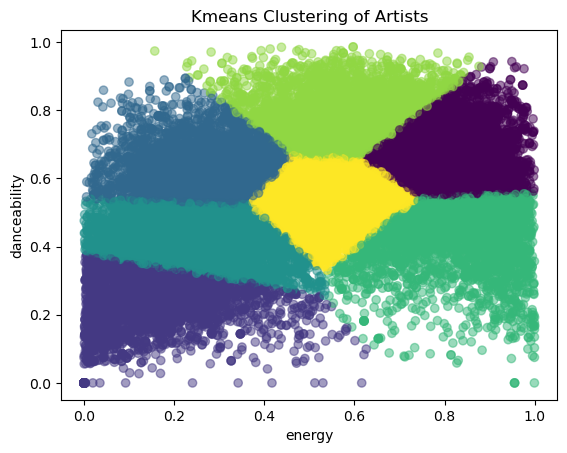

Cluster  key
0        7      660
         1      554
         11     520
         9      440
         2      415
               ... 
6        1      337
         6      331
         10     323
         8      249
         3      189
Name: key, Length: 84, dtype: int64


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df contains your DataFrame with the specified columns
features = df[['danceability', 'energy']]
# Filling NaN values with mean of respective columns
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initializing KMeans with the number of clusters
num_clusters = 7  # You can set the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fitting KMeans to the selected features
kmeans.fit(features_scaled)

# Getting cluster labels and assigning them to the DataFrame
df['Cluster'] = kmeans.labels_

# Displaying cluster counts
print(df['Cluster'].value_counts())


plt.scatter(df['energy'], df['danceability'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('energy')
plt.ylabel('danceability')
plt.title('Kmeans Clustering of Artists')
plt.show()

cluster_counts = df.groupby('Cluster')['key'].value_counts()
print(cluster_counts)

In [5]:
df2 = pd.read_csv('data_by_genres.csv')

df2.head(5)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


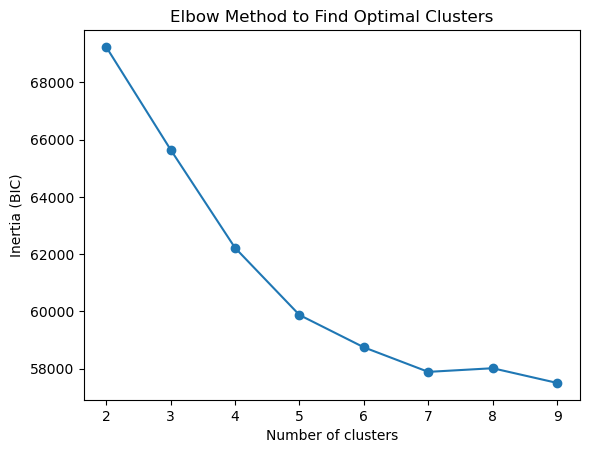

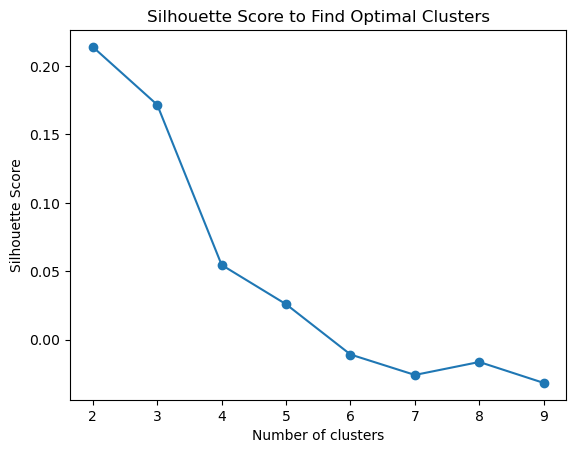

In [6]:
df2 = pd.read_csv('data_by_genres.csv')

# Extract relevant features for clustering
features2 = df2[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features2_scaled = scaler.fit_transform(features2)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):  # Try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(features2_scaled)
    inertia.append(gmm.bic(features2_scaled))  # Use BIC (Bayesian Information Criterion) as a measure of model fit
    labels = gmm.predict(features2_scaled)
    silhouette_scores.append(silhouette_score(features2_scaled, labels))

# Plotting inertia to find the elbow point
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (BIC)')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal Clusters')
plt.show()

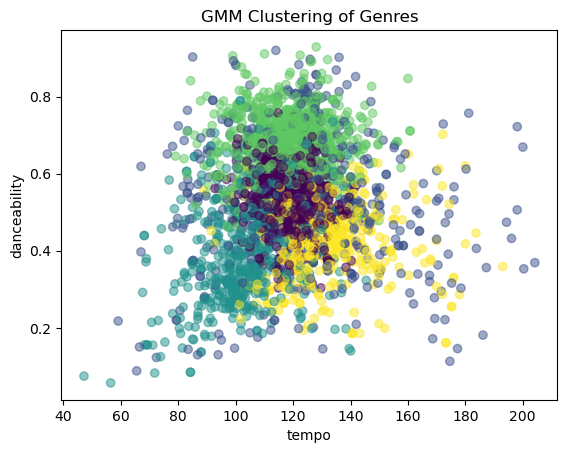

0    817
3    782
2    542
4    418
1    414
Name: cluster, dtype: int64
cluster  key
0        7      282
         9      113
         2       74
         5       72
         11      67
         0       57
         4       36
         6       30
         10      30
         1       19
         3       19
         8       18
1        7       78
         11      48
         2       41
         9       39
         1       36
         6       31
         0       28
         4       28
         5       26
         8       24
         10      20
         3       15
2        7      126
         5       79
         2       63
         0       55
         10      43
         9       33
         3       28
         6       27
         4       25
         1       23
         8       20
         11      20
3        7      145
         1      110
         11     109
         6       73
         9       65
         2       57
         5       56
         0       51
         10      45
         4    

In [7]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Extract relevant features for clustering
features2 = df2[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'popularity']]


# Standardize the features
scaler = StandardScaler()
features2_scaled = scaler.fit_transform(features2)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)  # You can adjust the number of components

# Fit the model
gmm.fit(features2_scaled)

# Add cluster labels to the original dataframe
df2['cluster'] = gmm.predict(features2_scaled)

# Visualize the clusters (you can modify this based on the number of features you choose)
plt.scatter(df2['tempo'], df2['danceability'], c=df2['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('tempo')
plt.ylabel('danceability')
plt.title('GMM Clustering of Genres')
plt.show()

# Check the distribution of classes within each cluster
print(df2['cluster'].value_counts())
cluster_counts = df2.groupby('cluster')['key'].value_counts()
print(cluster_counts)

3    857
4    616
1    571
0    522
2    407
Name: Cluster, dtype: int64


/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


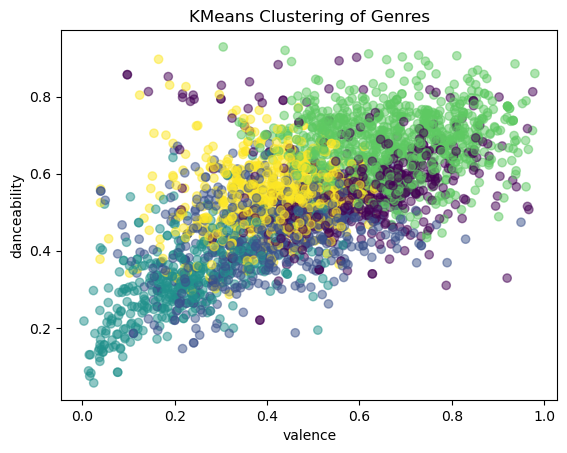

Cluster  key
0        7      155
         5       82
         9       48
         0       43
         10      37
         2       35
         11      30
         6       23
         8       23
         4       17
         1       15
         3       14
1        11     103
         9       91
         7       90
         2       68
         1       38
         4       36
         6       34
         0       29
         5       25
         8       23
         10      18
         3       16
2        7       93
         2       65
         5       49
         0       39
         1       25
         9       25
         10      25
         3       24
         6       18
         4       17
         11      15
         8       12
3        7      200
         11     110
         1       99
         9       85
         6       69
         0       61
         2       61
         10      49
         5       46
         4       41
         3       18
         8       18
4        7      156
       

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df contains your DataFrame with the specified columns
features = df2[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'popularity']]

# Filling NaN values with mean of respective columns
features = features.fillna(features.mean())

scaler = StandardScaler()
features2_scaled = scaler.fit_transform(features2)

# Initializing KMeans with the number of clusters
num_clusters = 5  # You can set the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fitting KMeans to the selected features
kmeans.fit(features2_scaled)

# Getting cluster labels and assigning them to the DataFrame
df2['Cluster'] = kmeans.labels_

# Displaying cluster counts
print(df2['Cluster'].value_counts())


plt.scatter(df2['valence'], df2['danceability'], c=df2['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('valence')
plt.ylabel('danceability')
plt.title('KMeans Clustering of Genres')
plt.show()

cluster_counts = df2.groupby('Cluster')['key'].value_counts()
print(cluster_counts)

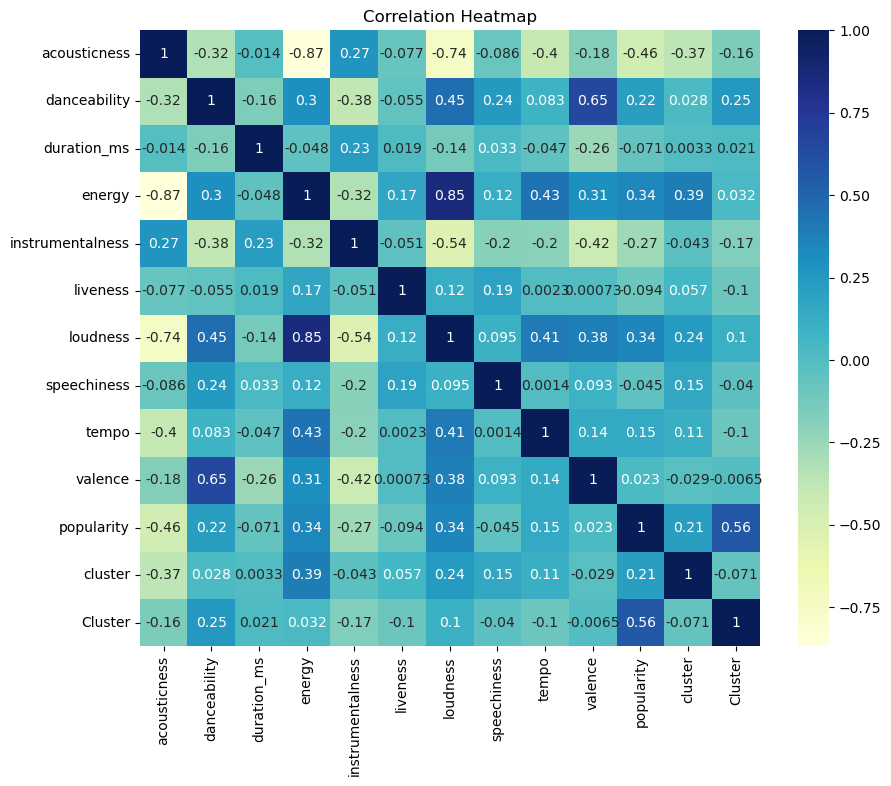

In [10]:
import seaborn as sns
selected_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'cluster', 'Cluster']

# Selecting the subset of columns
selected_df2 = df2[selected_columns]

# Calculating the correlation matrix
correlation_matrix2 = selected_df2.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
TS = df[df['artists'].str.contains('Taylor Swift')]
print(TS)

In [ ]:
KP = df[df['artists'].str.contains('Katy Perry')]
print(KP)

In [ ]:
SC = df[df['artists'].str.contains('Sabrina Carpenter')]
print(SC)

In [ ]:
cluster_5_df = df[df['cluster'] == 5]
cluster_5_df.head(40)

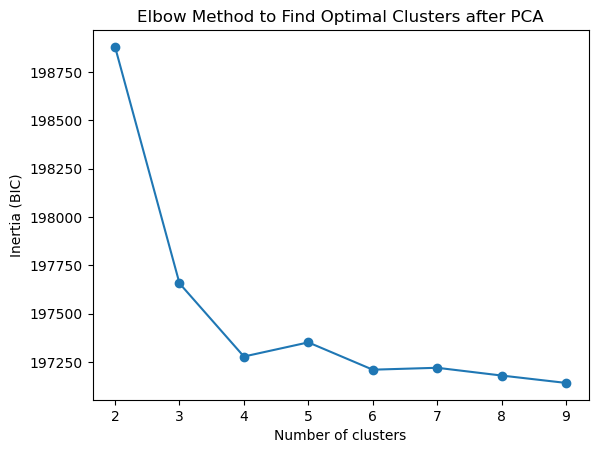

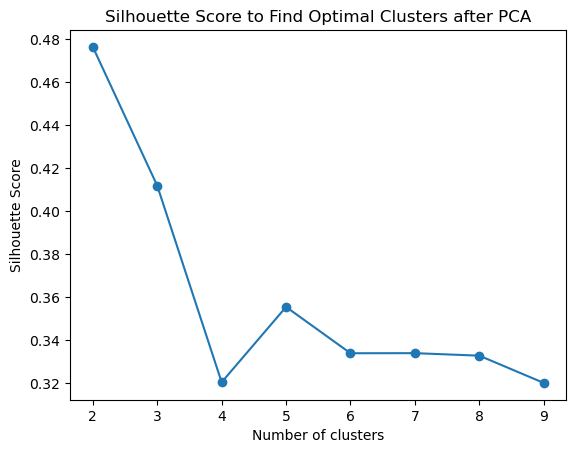

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
df3 = pd.read_csv("data_by_artist.csv")

# Extract relevant features for clustering
features3 = df3[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features3_scaled = scaler.fit_transform(features3)

# PCA
pca = PCA(n_components=2)  # Choose the number of components for PCA
pca_result = pca.fit_transform(features3_scaled)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):  # Try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(pca_result)
    inertia.append(gmm.bic(pca_result))  # Use BIC (Bayesian Information Criterion) as a measure of model fit
    labels = gmm.predict(pca_result)
    silhouette_scores.append(silhouette_score(pca_result, labels))

# Plotting inertia to find the elbow point
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (BIC)')
plt.title('Elbow Method to Find Optimal Clusters after PCA')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal Clusters after PCA')
plt.show()


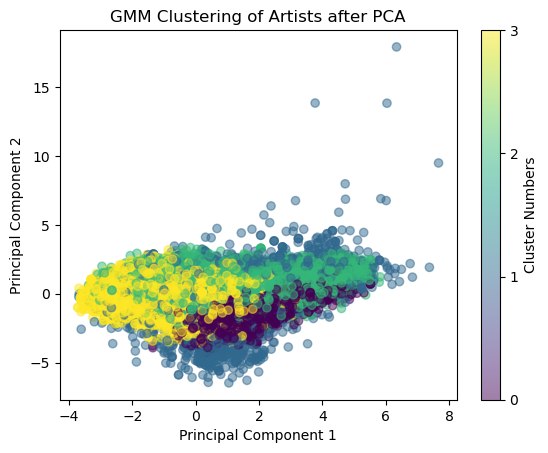

3    13129
2     9525
0     3014
1     3012
Name: GMM Cluster, dtype: int64
GMM Cluster  key
0            7       436
             5       329
             2       312
             0       284
             10      261
             3       233
             9       225
             4       203
             11      199
             6       187
             8       179
             1       166
1            7       394
             1       328
             2       313
             11      295
             5       274
             0       263
             10      251
             9       236
             8       201
             4       175
             6       175
             3       107
2            7      1562
             2      1094
             5      1058
             0      1011
             9       991
             10      698
             4       633
             11      616
             1       557
             6       463
             8       443
             3       399
3      

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Assuming you have a DataFrame df3 with relevant features
# Extract relevant features for clustering
features3 = df3[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features3_scaled = scaler.fit_transform(features3)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(features3_scaled)

# Initialize Gaussian Mixture Model
num_components = 4  # You can adjust the number of components
gmm = GaussianMixture(n_components=num_components, random_state=42)

# Fit the model
gmm.fit(features3_scaled)

# Add cluster labels to the original dataframe
df3['GMM Cluster'] = gmm.predict(features3_scaled)

# Visualize the clusters after PCA
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df3['GMM Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering of Artists after PCA')

# Create a colorbar with cluster labels
legend = plt.colorbar(scatter)
legend.set_ticks(df3['GMM Cluster'].unique())
legend.set_label('Cluster Numbers')

plt.show()

# Check the distribution of classes within each cluster
print(df3['GMM Cluster'].value_counts())
cluster_counts = df3.groupby('GMM Cluster')['key'].value_counts()
print(cluster_counts)


/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    14725
1     8718
2     3938
3     1299
Name: K-Means Cluster, dtype: int64


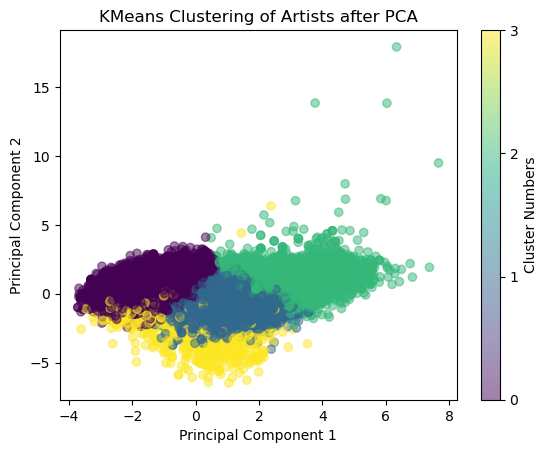

K-Means Cluster  key
0                7      2128
                 9      1521
                 2      1518
                 1      1472
                 11     1439
                 0      1395
                 5      1132
                 6      1084
                 4       970
                 10      962
                 8       742
                 3       362
1                7      1361
                 5      1138
                 0      1030
                 2       840
                 10      723
                 9       715
                 3       558
                 4       539
                 8       500
                 11      462
                 1       426
                 6       426
2                7       596
                 2       553
                 5       424
                 0       423
                 10      344
                 9       315
                 4       277
                 1       266
                 3       256
                 8    

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming you have a DataFrame df3 with relevant features
# Extract relevant features for clustering
features3 = df3[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features3_scaled = scaler.fit_transform(features3)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(features3_scaled)

# Initializing KMeans with the number of clusters
num_clusters = 4  # You can set the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fitting KMeans to the selected features
kmeans.fit(features3_scaled)

# Getting cluster labels and assigning them to the DataFrame
df3['K-Means Cluster'] = kmeans.labels_

# Displaying cluster counts
print(df3['K-Means Cluster'].value_counts())

# Visualizing the clusters after PCA
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df3['K-Means Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Artists after PCA')

# Create a colorbar with cluster labels
legend = plt.colorbar(scatter)
legend.set_ticks(df3['K-Means Cluster'].unique())
legend.set_label('Cluster Numbers')

plt.show()

# Optional: Displaying cluster counts for 'key' within each cluster
cluster_counts = df3.groupby('K-Means Cluster')['key'].value_counts()
print(cluster_counts)



In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df3 = pd.read_csv("data_by_artist.csv")

# Extract relevant features for clustering
features3 = df3[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features3_scaled = scaler.fit_transform(features3)

# PCA for feature extraction
num_components = 11  # Choose the number of components you want to extract
pca = PCA(n_components=num_components)
features3_pca = pca.fit_transform(features3_scaled)

# Creating a DataFrame with the extracted features
columns = [f"PC{i+1}" for i in range(num_components)]
features3_pca_df = pd.DataFrame(data=features3_pca, columns=columns)

# Print the variance explained by each principal component
print("Variance explained by each principal component:")
print(pca.explained_variance_ratio_)

# Use features3_pca_df in downstream tasks


Variance explained by each principal component:
[0.33464363 0.13103036 0.10592749 0.09239878 0.08345918 0.07332302
 0.06624851 0.04858238 0.02939243 0.02546235 0.00953187]


/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

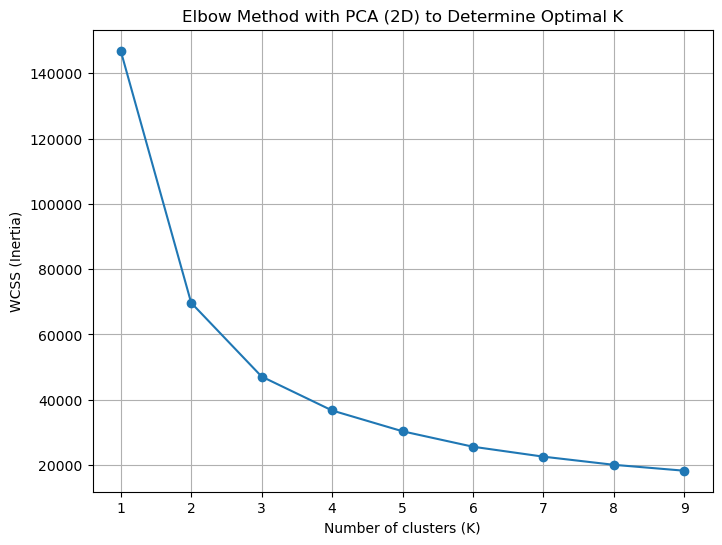

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df3 = pd.read_csv("data_by_artist.csv")

# Extract relevant features for clustering
features3 = df3[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
features3_scaled = scaler.fit_transform(features3)

# PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features3_pca = pca.fit_transform(features3_scaled)

# Calculate WCSS for different values of K
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features3_pca)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS in KMeans

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method with PCA (2D) to Determine Optimal K')
plt.grid(True)
plt.show()



In [42]:
TS = df3[df3['artists'].str.contains('Taylor Swift')]
print(TS)

       mode  count  acousticness       artists  danceability    duration_ms  \
24076     1    440      0.225236  Taylor Swift       0.60248  237971.727273   

         energy  instrumentalness  liveness  loudness  speechiness  \
24076  0.615055          0.000423  0.147943 -6.481543     0.050815   

            tempo   valence  popularity  key  cluster  Cluster  
24076  122.845527  0.426964   59.177273    7        3        2  


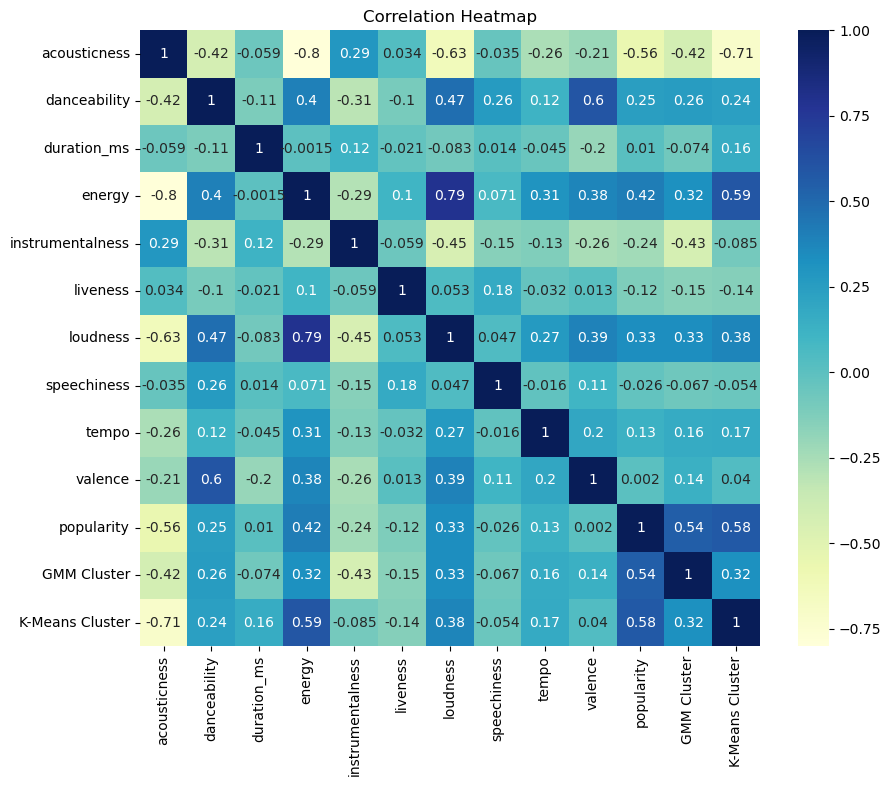

In [52]:
import seaborn as sns
selected_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'GMM Cluster', 'K-Means Cluster']

# Selecting the subset of columns
selected_df3 = df3[selected_columns]

# Calculating the correlation matrix
correlation_matrix3 = selected_df3.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [68]:
Cluster_0_df = df3[df3['GMM Cluster'] == 0]
Cluster_0_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
60,1,2,0.995000,2014 ATHINAIKI DISCOGRAFIKI,0.501000,189453.000000,0.341000,0.011700,0.418000,-11.514000,0.081400,109.956000,0.621000,0.000000,2,0,3,1,0
191,1,1,0.995000,A. Likiardopoulou,0.357000,192707.000000,0.306000,0.069000,0.121000,-14.339000,0.039300,111.982000,0.462000,0.000000,7,0,3,1,0
193,1,1,0.962000,A. Merangulian,0.366000,189280.000000,0.253000,0.561000,0.099200,-14.905000,0.043400,145.377000,0.510000,0.000000,0,0,3,1,0
194,0,2,0.924000,A. Merangulian with folk instrumental ensemble,0.508000,175640.000000,0.441000,0.952000,0.314000,-14.508000,0.044900,111.486000,0.826000,0.000000,4,0,3,1,0
195,1,5,0.881000,A. P. Komala,0.544200,167498.600000,0.489800,0.040686,0.281800,-7.355200,0.051560,107.549600,0.701600,0.000000,2,0,3,1,0
197,0,24,0.975833,A. R. Ojha,0.619667,186113.250000,0.211417,0.151866,0.184500,-10.131250,0.209517,115.714167,0.743667,0.000000,2,0,3,1,0
198,1,21,0.957952,A. R. Oza,0.685476,184620.095238,0.221048,0.126590,0.217810,-9.764524,0.298171,114.622619,0.726238,0.000000,7,0,3,1,0
199,1,14,0.991571,A. R. Qureshi,0.624286,168611.142857,0.318571,0.558857,0.387571,-11.383857,0.185314,142.568286,0.786143,0.000000,8,0,3,1,0
200,0,2,0.993000,A. Xatzixristos,0.564000,187787.000000,0.390000,0.883000,0.114000,-13.142000,0.034900,105.900000,0.870000,0.000000,11,0,3,1,0
237,1,97,0.973557,ANTONIS NTALGKAS,0.488216,189059.041237,0.403680,0.544012,0.177161,-10.933206,0.060072,112.699237,0.701856,0.020619,11,0,3,1,0


In [63]:
Cluster_1_df = df3[df3['GMM Cluster'] == 1]
Cluster_1_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,2.503186e+05,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,3,1,1
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,2.872800e+05,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,3,1,1
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,3.289200e+05,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,3,1,1
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,2.628910e+05,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,3,1,1
6,1,2,0.725000,"""Mama"" Helen Teagarden",0.637000,1.355330e+05,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,3,1,1
7,1,2,0.927000,"""Test for Victor Young""",0.734000,1.756930e+05,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,1,3,1
9,1,15,0.544467,$NOT,0.789800,1.379105e+05,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,1,0,1
13,1,125,0.141485,$uicideBoy$,0.749344,1.463864e+05,0.635552,0.045675,0.202253,-6.631304,0.156108,115.022024,0.287286,61.800000,1,1,2,0,1
36,1,2,0.991000,12 Pianists,0.414000,1.377330e+05,0.018700,0.892000,0.051300,-39.385000,0.055700,74.477000,0.195000,52.000000,7,1,0,2,1
39,0,6,0.670000,1422,0.466333,4.261500e+04,0.874667,0.117568,0.391000,-4.884000,0.216633,98.253667,0.658333,32.000000,7,1,2,0,1


In [64]:
Cluster_2_df = df3[df3['GMM Cluster'] == 2]
Cluster_2_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,2,2,0,2
5,1,36,0.609556,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,2,3,1,2
11,1,1,0.000122,$pyda,0.514000,331240.000000,0.899000,0.079300,0.367000,-5.115000,0.060200,174.028000,0.266000,59.000000,7,2,2,0,2
17,1,16,0.105556,'Til Tuesday,0.557125,255213.500000,0.612250,0.023300,0.127587,-9.638125,0.032150,103.080250,0.532625,34.625000,0,2,2,0,2
18,1,2,0.847000,((( O ))),0.410000,311837.000000,0.169000,0.003270,0.117000,-11.422000,0.048500,89.494000,0.208000,67.000000,3,2,0,2,2
22,1,105,0.191611,*NSYNC,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,2,2,0,2
28,0,2,0.021700,10 Ft. Ganja Plant,0.789000,236253.000000,0.793000,0.826000,0.112000,-6.629000,0.107000,149.368000,0.743000,50.000000,4,2,2,0,2
30,1,42,0.190833,"10,000 Maniacs",0.584476,236012.619048,0.542076,0.008760,0.229705,-13.288048,0.037852,118.476095,0.573810,37.000000,9,2,2,0,2
32,1,16,0.588875,101 Strings Orchestra,0.292525,173106.375000,0.397000,0.714538,0.195375,-13.496375,0.037975,100.623125,0.391525,27.000000,0,2,0,2,2
33,1,38,0.230821,10cc,0.560632,298796.578947,0.567316,0.007471,0.152095,-10.354053,0.066111,121.800263,0.555000,41.578947,7,2,2,0,2


In [62]:
Cluster_3_df = df3[df3['GMM Cluster'] == 3]
Cluster_3_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
8,1,122,0.173145,"""Weird Al"" Yankovic",0.662787,218948.196721,0.695393,4.980262e-05,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,3,2,0,3
10,1,2,0.239000,$atori Zoom,0.883000,141519.000000,0.625000,0.000000e+00,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,3,2,0,3
12,1,2,0.148100,$tupid Young,0.854000,190572.000000,0.683000,2.075000e-06,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,3,2,0,3
14,1,13,0.624769,'In The Heights' Original Broadway Company,0.563615,314023.615385,0.457692,8.692308e-06,0.204385,-8.338462,0.152454,117.006846,0.467538,47.692308,7,3,2,0,3
15,1,9,0.553889,'Legally Blonde' Ensemble,0.648444,304211.888889,0.441111,2.544444e-05,0.214667,-11.459778,0.495111,114.808444,0.524778,48.666667,2,3,1,3,3
16,1,2,0.604500,'Legally Blonde' Greek Chorus,0.773500,361780.000000,0.309500,0.000000e+00,0.222200,-12.669000,0.289000,105.700000,0.596500,48.000000,10,3,1,3,3
19,1,2,0.538000,(Con La Participación de Marc Anthony),0.731000,361440.000000,0.794000,2.390000e-05,0.073600,-4.182000,0.040800,88.003000,0.873000,43.000000,5,3,2,0,3
20,0,4,0.011235,(G)I-DLE,0.640500,196969.000000,0.800000,0.000000e+00,0.252000,-4.473500,0.048750,151.013250,0.375000,79.250000,1,3,2,0,3
21,1,10,0.011631,(Hed) P.E.,0.589200,253677.400000,0.879200,2.026000e-06,0.171120,-5.259800,0.172140,134.969400,0.427000,45.800000,2,3,2,0,3
23,1,8,0.012816,+44,0.451500,205250.000000,0.883250,2.400000e-06,0.150700,-4.261750,0.079075,168.371250,0.391250,43.500000,2,3,2,0,3


In [69]:
Cluster_0_df = df3[df3['K-Means Cluster'] == 0]
Cluster_0_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,9.400291e-03,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,2,2,0,2
8,1,122,0.173145,"""Weird Al"" Yankovic",0.662787,218948.196721,0.695393,4.980262e-05,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,3,2,0,3
9,1,15,0.544467,$NOT,0.789800,137910.466667,0.532933,2.306258e-02,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,1,0,1
10,1,2,0.239000,$atori Zoom,0.883000,141519.000000,0.625000,0.000000e+00,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,3,2,0,3
11,1,1,0.000122,$pyda,0.514000,331240.000000,0.899000,7.930000e-02,0.367000,-5.115000,0.060200,174.028000,0.266000,59.000000,7,2,2,0,2
12,1,2,0.148100,$tupid Young,0.854000,190572.000000,0.683000,2.075000e-06,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,3,2,0,3
13,1,125,0.141485,$uicideBoy$,0.749344,146386.392000,0.635552,4.567510e-02,0.202253,-6.631304,0.156108,115.022024,0.287286,61.800000,1,1,2,0,1
14,1,13,0.624769,'In The Heights' Original Broadway Company,0.563615,314023.615385,0.457692,8.692308e-06,0.204385,-8.338462,0.152454,117.006846,0.467538,47.692308,7,3,2,0,3
17,1,16,0.105556,'Til Tuesday,0.557125,255213.500000,0.612250,2.330025e-02,0.127587,-9.638125,0.032150,103.080250,0.532625,34.625000,0,2,2,0,2
19,1,2,0.538000,(Con La Participación de Marc Anthony),0.731000,361440.000000,0.794000,2.390000e-05,0.073600,-4.182000,0.040800,88.003000,0.873000,43.000000,5,3,2,0,3


In [70]:
Cluster_1_df = df3[df3['K-Means Cluster'] == 1]
Cluster_1_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,3,1,1
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,3,1,1
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,3,1,1
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,3,1,1
5,1,36,0.609556,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,2,3,1,2
6,1,2,0.725000,"""Mama"" Helen Teagarden",0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,3,1,1
40,1,2,0.891500,1776 Ensemble,0.589500,193206.500000,0.402500,0.000000,0.472500,-11.348500,0.172000,97.403500,0.594000,23.000000,0,3,3,1,3
59,1,8,0.475000,2004 Hawaii Music Awards Compilation Of The Year,0.463000,218640.000000,0.402250,0.200692,0.243750,-10.978500,0.030075,125.391250,0.405500,1.250000,9,2,3,1,2
60,1,2,0.995000,2014 ATHINAIKI DISCOGRAFIKI,0.501000,189453.000000,0.341000,0.011700,0.418000,-11.514000,0.081400,109.956000,0.621000,0.000000,2,0,3,1,0
61,1,6,0.831000,20th Century Fox Studio Orchestra,0.346667,101480.333333,0.326000,0.810333,0.336767,-13.196000,0.036933,100.024333,0.632667,0.000000,5,2,3,1,2


In [71]:
Cluster_2_df = df3[df3['K-Means Cluster'] == 2]
Cluster_2_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
18,1,2,0.847000,((( O ))),0.410000,311837.000000,0.169000,0.003270,0.117000,-11.422000,0.048500,89.494000,0.208000,67.000000,3,2,0,2,2
32,1,16,0.588875,101 Strings Orchestra,0.292525,173106.375000,0.397000,0.714538,0.195375,-13.496375,0.037975,100.623125,0.391525,27.000000,0,2,0,2,2
36,1,2,0.991000,12 Pianists,0.414000,137733.000000,0.018700,0.892000,0.051300,-39.385000,0.055700,74.477000,0.195000,52.000000,7,1,0,2,1
58,1,6,0.905000,2002,0.229000,267840.333333,0.155000,0.852333,0.105267,-19.014333,0.035533,114.312000,0.063333,48.333333,7,2,0,2,2
115,1,2,0.996000,520Hz,0.000000,197680.000000,0.019700,0.996000,0.104000,-47.190000,0.000000,0.000000,0.000000,57.000000,1,1,0,2,1
138,0,2,0.952000,90sFlav,0.748000,126250.000000,0.265000,0.917000,0.086600,-12.074000,0.229000,77.009000,0.140000,70.000000,8,1,0,2,1
174,1,1,0.915000,A Tree Grows in Brooklyn Orchestra,0.261000,302533.000000,0.379000,0.845000,0.146000,-10.377000,0.034200,111.529000,0.269000,1.000000,3,2,0,2,2
177,1,2,0.767000,A Winged Victory for the Sullen,0.080400,266840.000000,0.083600,0.853000,0.119000,-21.007000,0.040000,82.140000,0.049800,46.000000,11,2,0,2,2
260,1,125,0.955224,Aaron Copland,0.350279,259123.568000,0.156020,0.436706,0.157872,-19.230776,0.063837,106.760888,0.223747,7.560000,7,2,0,2,2
264,0,1,0.758000,Aaron Krause,0.325000,223893.000000,0.201000,0.000000,0.097700,-11.595000,0.028200,81.869000,0.172000,67.000000,6,3,0,2,3


In [72]:
Cluster_3_df = df3[df3['K-Means Cluster'] == 3]
Cluster_3_df.head(40)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster,Cluster,K-Means Cluster,GMM Cluster
7,1,2,0.927000,"""Test for Victor Young""",0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,1,3,1
15,1,9,0.553889,'Legally Blonde' Ensemble,0.648444,304211.888889,0.441111,0.000025,0.214667,-11.459778,0.495111,114.808444,0.524778,48.666667,2,3,1,3,3
16,1,2,0.604500,'Legally Blonde' Greek Chorus,0.773500,361780.000000,0.309500,0.000000,0.222200,-12.669000,0.289000,105.700000,0.596500,48.000000,10,3,1,3,3
63,1,1,0.948000,"22, Little Red, Tangle Eye & Hard Hair",0.789000,278082.000000,0.352000,0.000778,0.086700,-9.337000,0.660000,139.616000,0.659000,16.000000,8,1,1,3,1
65,1,2,0.281000,22Gz,0.830000,190746.000000,0.574000,0.000000,0.124000,-6.892000,0.701000,143.892000,0.538000,70.000000,11,1,1,3,1
70,1,2,0.015800,2Baba,0.591000,283000.000000,0.602000,0.000000,0.278000,-7.483000,0.386000,147.957000,0.355000,0.000000,1,3,1,3,3
72,1,4,0.291200,2KBABY,0.622500,147745.000000,0.418000,0.000000,0.203000,-9.268500,0.479000,103.163000,0.402000,69.500000,11,3,1,3,3
76,1,1,0.093800,2Pac a.k.a. Makaveli,0.893000,293840.000000,0.576000,0.000000,0.075800,-7.514000,0.357000,94.307000,0.861000,42.000000,1,3,1,3,3
82,1,1,0.075700,2toxic,0.764000,214689.000000,0.403000,0.000000,0.044300,-10.295000,0.358000,96.114000,0.349000,16.000000,1,3,1,3,3
117,0,1,0.158000,5th Ward Boyz,0.842000,352173.000000,0.336000,0.000000,0.256000,-8.227000,0.379000,78.001000,0.599000,36.000000,4,3,1,3,3


In [74]:
Ed = df3[df3['artists'].str.contains('Ed Sheeran')]
print(Ed)

      mode  count  acousticness     artists  danceability    duration_ms  \
7018     1    145      0.414673  Ed Sheeran      0.663993  240009.310345   

        energy  instrumentalness  liveness  loudness  speechiness       tempo  \
7018  0.497108          0.000246  0.176846 -8.051876     0.077952  103.165979   

       valence  popularity  key  cluster  Cluster  K-Means Cluster  \
7018  0.509055   66.234483    8        3        2                0   

      GMM Cluster  
7018            3  
